# Steps to follow KNN
* Importing Library and Load Data
* Missing values and Outliers
* Normalize the data - Scalar
* Data Imbalance
* Apply KNN model
* Accuracy


In [44]:
# iMPORT THE  Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline
import warnings
warnings.filterwarnings('ignore')


UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
data =pd.read_csv('d:\\DEC\\LB\\KNN\\Classified Data',index_col=0)

In [3]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [4]:
# Check the data information like shape,non-null values and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
# check the statistical descreption
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


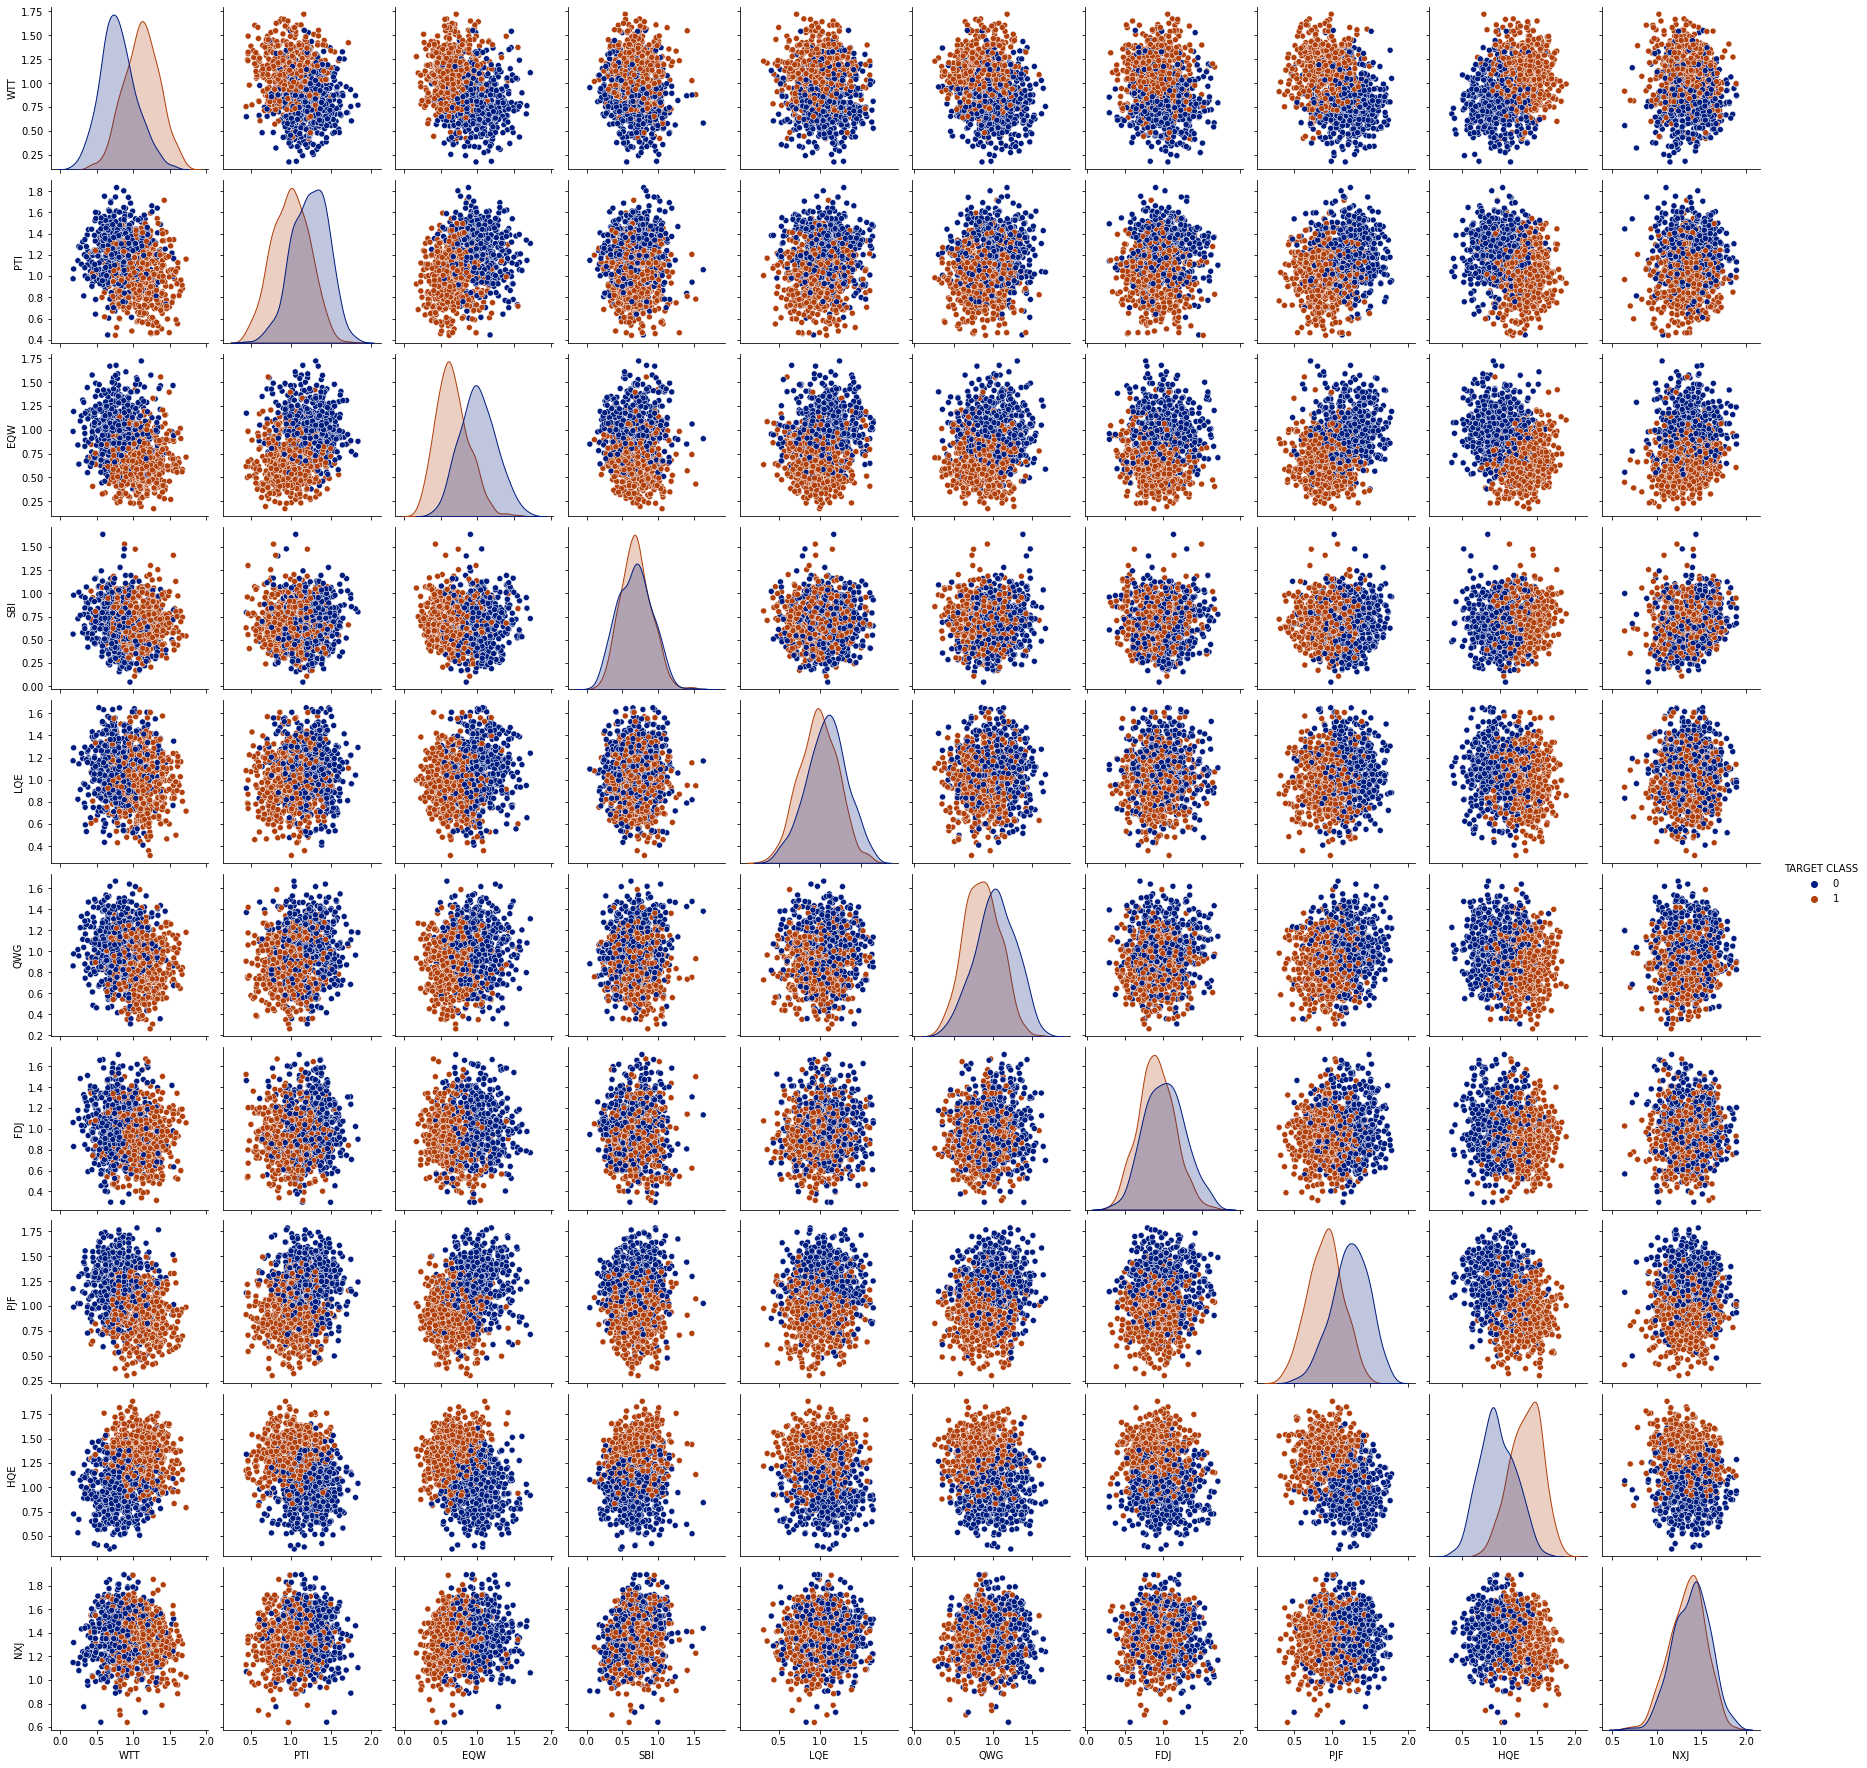

In [6]:
# Did not find any missing value 
sns.pairplot(data=data,hue='TARGET CLASS',palette='dark')

In [7]:
X= data.drop(['TARGET CLASS'],axis=1)
y=data.iloc[:,-1]
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [8]:
# Scaling the feratures
from tkinter.font import names
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =sc.fit_transform(X)

# after the Scaling the data convert back to Dataframe
col_name = ['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
x= pd.DataFrame(x,columns=col_name)
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
# Check data Imbalance
y.value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [10]:
# data train and test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)
print(xtrain.shape,ytrain.shape)

(800, 10) (800,)


## KNN model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [12]:
# predict the train and test dataset
pred_test=kn.predict(xtest)
pred_train=kn.predict(xtrain)

In [13]:
# evaluate the result
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Classification report of train
print('Classification report of train:\n',classification_report(ytrain,pred_train))

# Classification report of test
print('Classification report of Test:\n',classification_report(ytest,pred_test))


# accuracy of train
print('accuracy of train:\n',accuracy_score(ytrain,pred_train))
# accuracy of tesst
print('accuracy of tesst:\n',accuracy_score(ytest,pred_test))


# confusion matricx of test dataset
print("Confusin matrix:\n",confusion_matrix(ytest,pred_test))

Classification report of train:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       394
           1       0.93      0.97      0.95       406

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800

Classification report of Test:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.93      0.90      0.92        94

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

accuracy of train:
 0.95
accuracy of tesst:
 0.925
Confusin matrix:
 [[100   6]
 [  9  85]]


In [139]:
### Error rate to improve accuracy of the KNN model

error_rate=[]
for i in range(1,20):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    pred_knn=kn.predict(xtest)
    error_rate.append(np.mean(ytest!=pred_knn))

Text(0, 0.5, 'error-rate')

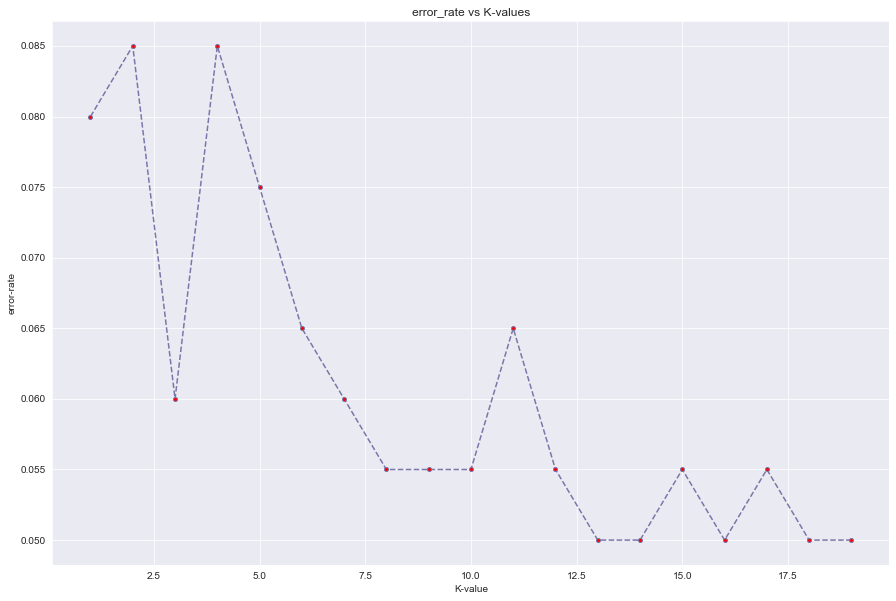

In [140]:
# plot the graph to see best k-value
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
plt.plot(range(1,20),error_rate,color='#77a',linestyle='dashed',marker='o',markersize=4,mfc='red')
plt.title('error_rate vs K-values')
plt.xlabel('K-value')
plt.ylabel('error-rate')

In [150]:
# model training
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(xtrain,ytrain)
# prediction
pred_test=knn.predict(xtest)
pred_train=knn.predict(xtrain)

In [151]:
# evaluate the result
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Classification report of train
print('Classification report of train:\n',classification_report(ytrain,pred_train))

# Classification report of test
print('Classification report of Test:\n',classification_report(ytest,pred_test))


# accuracy of train
print('accuracy of train:\n',accuracy_score(ytrain,pred_train))
# accuracy of tesst
print('accuracy of tesst:\n',accuracy_score(ytest,pred_test))


# confusion matricx of test dataset
print("Confusin matrix:\n",confusion_matrix(ytest,pred_test))

Classification report of train:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       394
           1       0.93      0.96      0.94       406

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

Classification report of Test:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       106
           1       0.94      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

accuracy of train:
 0.9425
accuracy of tesst:
 0.95
Confusin matrix:
 [[100   6]
 [  4  90]]
